In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../Classes')

# Import custom classes
import Regression
import PlotTools

#Reload Classes to avoid having to restart kernel
from importlib import reload
reload(Regression)
reload(PlotTools)

from Regression import *
from PlotTools import *

from matplotlib.animation import FuncAnimation




[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

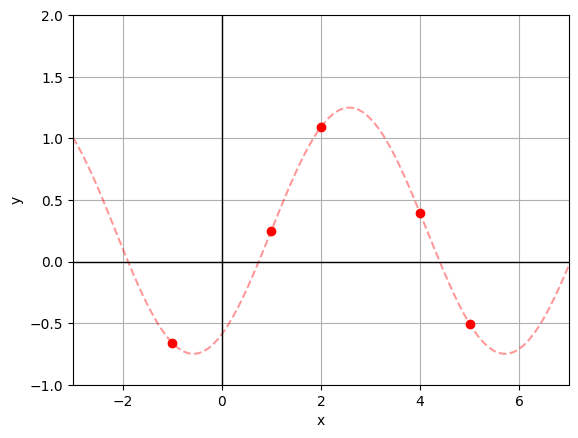

In [29]:
#Consider the function

def y(x):
    return np.sin(x-1) + 1/4


samples = np.array([-1, 1, 2, 4, 5]).astype(float)
xs = np.linspace(-3, 7, 100)

fig, ax = plt.subplots()
coordinate_axes(ax, lw = 1)

ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)

ax.grid(zorder = 0)
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))


In [ ]:
KR_2nd = KernelRegression(samples, y(samples), 
        kernel = 'poly', degree =2, reg_type = '2nd Polynomial Ridge', lmb = 1e-4, 
        x_range= (-3, 7))

KR_2nd.regression()
print(f'The coeffiecients are {KR_2nd.alphas}')

The coeffiecients are [  892.6677605  -3589.96968552  2716.35280965   854.90534482
  -873.87003245]


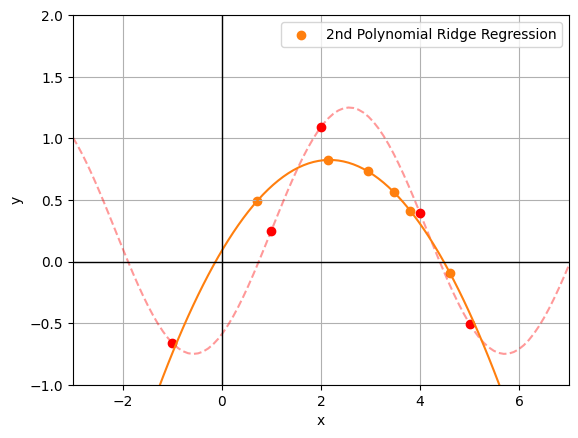

In [31]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)


x_random = np.random.uniform(-3, 7, 10)

KR_2nd.plot(ax, x_random, solid_line=True)
ax.grid()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))
ax.legend()

In [54]:


KR_8th = KernelRegression(samples, y(samples), 
        kernel = 'poly', degree = 8, reg_type = '8th Polynomial Ridge', lmb = 1e0, 
        x_range= (-3, 7))

KR_8th.regression()
print(f'The coeffiecients are {KR_8th.alphas}')

The coeffiecients are [-2.53390135e-03  3.11516048e-03 -1.63790662e-04  3.26798372e-06
 -4.48032078e-07]


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

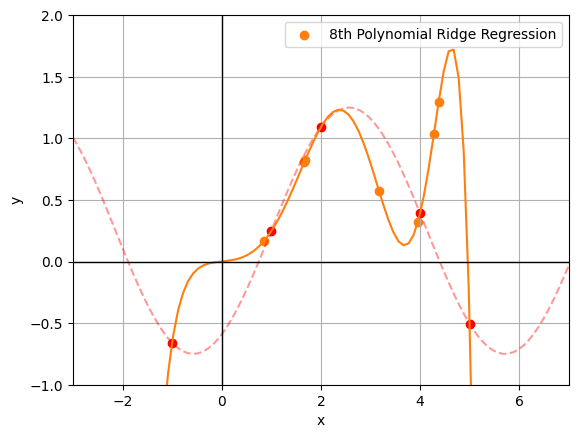

In [55]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)


x_random = np.random.uniform(-3, 5, 10)

KR_8th.plot(ax, x_random, solid_line=True)
ax.grid()
ax.legend()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))

In [34]:
bandwidth = 1

def gaussian_kernel(xi, xj):
    K_ij = np.exp(-0.5 * (xi - xj)**2/bandwidth**2)
    return K_ij


KR_gauss = KernelRegression(samples, y(samples), 
        kernel = 'gauss', bandwidth = 1, reg_type = 'Gauss Kernel Ridge', lmb = 1e-4, 
        x_range= (-3, 5))

KR_gauss.regression()
print(f'The coeffiecients are {KR_gauss.alphas}')

The coeffiecients are [-0.61354006 -0.44122493  1.2615103   0.85577004 -1.03961539]


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

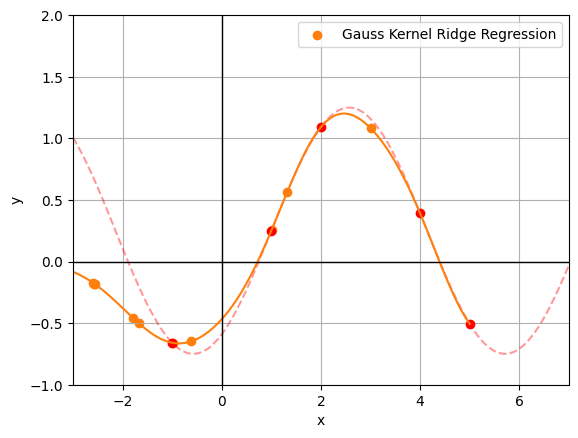

In [35]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)




KR_gauss.plot(ax, x_random, solid_line=True)
ax.grid()
ax.legend()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

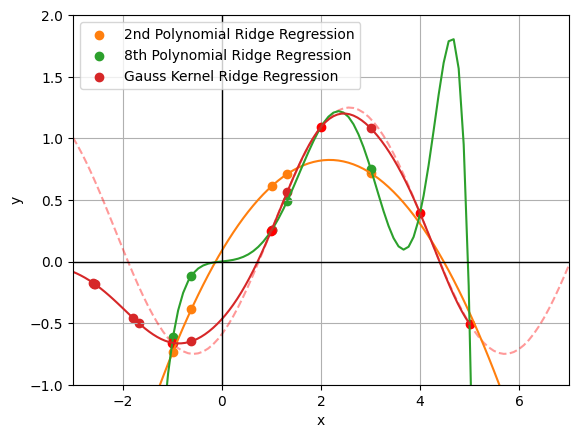

In [36]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)




KR_2nd.plot(ax, x_random, solid_line=True, color = 'C1')
KR_8th.plot(ax, x_random, solid_line=True, color = 'C2')
KR_gauss.plot(ax, x_random, solid_line=True, color = 'C3')
ax.grid()
ax.legend()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))

The coeffiecients are [   168.77396926  -2941.66872413   1899.06548606 -13893.97178897
   2955.58742426  -4108.22172295   4333.20966248   3942.09536749
   8575.41478368   4969.72280838  -6378.11015122   6314.3784066
    412.3850896    7618.0020836   -5022.87252536  -5067.38405481
  -1013.37846444 -11983.82765047   2924.27639049   6297.11894375]
The coeffiecients are [  767.8536388   -651.48272678 -1103.39545786  -717.36986435
   332.51394818  -308.78608018  -472.81856277 -1618.345634
  2213.52426448 -1554.16426037   550.53848086  1353.82980804
     6.11379437   163.89957858    42.52847087    74.3166719
   -32.53249763   541.29821771   321.44019625    90.36916445]
The coeffiecients are [  854.72607637  -661.82989884 -1265.56313915    93.53057162
    97.61164868   232.60974565  -160.53039355 -1178.1622586
  1665.54555882 -1585.20227724  -162.50339656  1558.71675015
  -114.78440591    71.37793652  -216.8075097    198.74534474
   264.98157599   -86.62763087   126.83902729   267.70102115]


<Axes: >

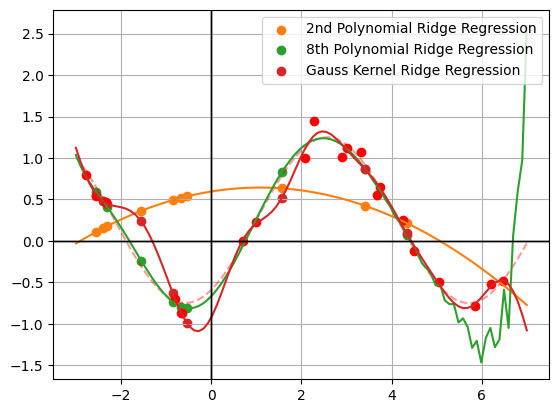

In [54]:
x_samples_with_noise = np.random.uniform(-3, 7, 20) 
y_samples_with_noise = y(x_samples_with_noise) + np.random.normal(0, 0.1, 20)
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)

ax.plot(x_samples_with_noise, y_samples_with_noise, 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)


kernels = [poly_kernel_2, poly_kernel_8, gaussian_kernel]
reg_types = ['2nd Polynomial Ridge', '8th Polynomial Ridge', 'Gauss Kernel Ridge']
colors = ['C1', 'C2', 'C3']

for kernel, color, reg_type in zip(kernels, colors, reg_types):
    KR = KernelRegression(x_samples_with_noise, y_samples_with_noise, 
        kernel = kernel, reg_type = reg_type, lmb = 1e-4, 
        x_range= (-3, 7))

    KR.regression()
    print(f'The coeffiecients are {KR.alphas}')
    KR.plot(ax, x_random, solid_line=True, color = color)


ax.grid()
ax.legend()
coordinate_axes(ax, lw = 1)